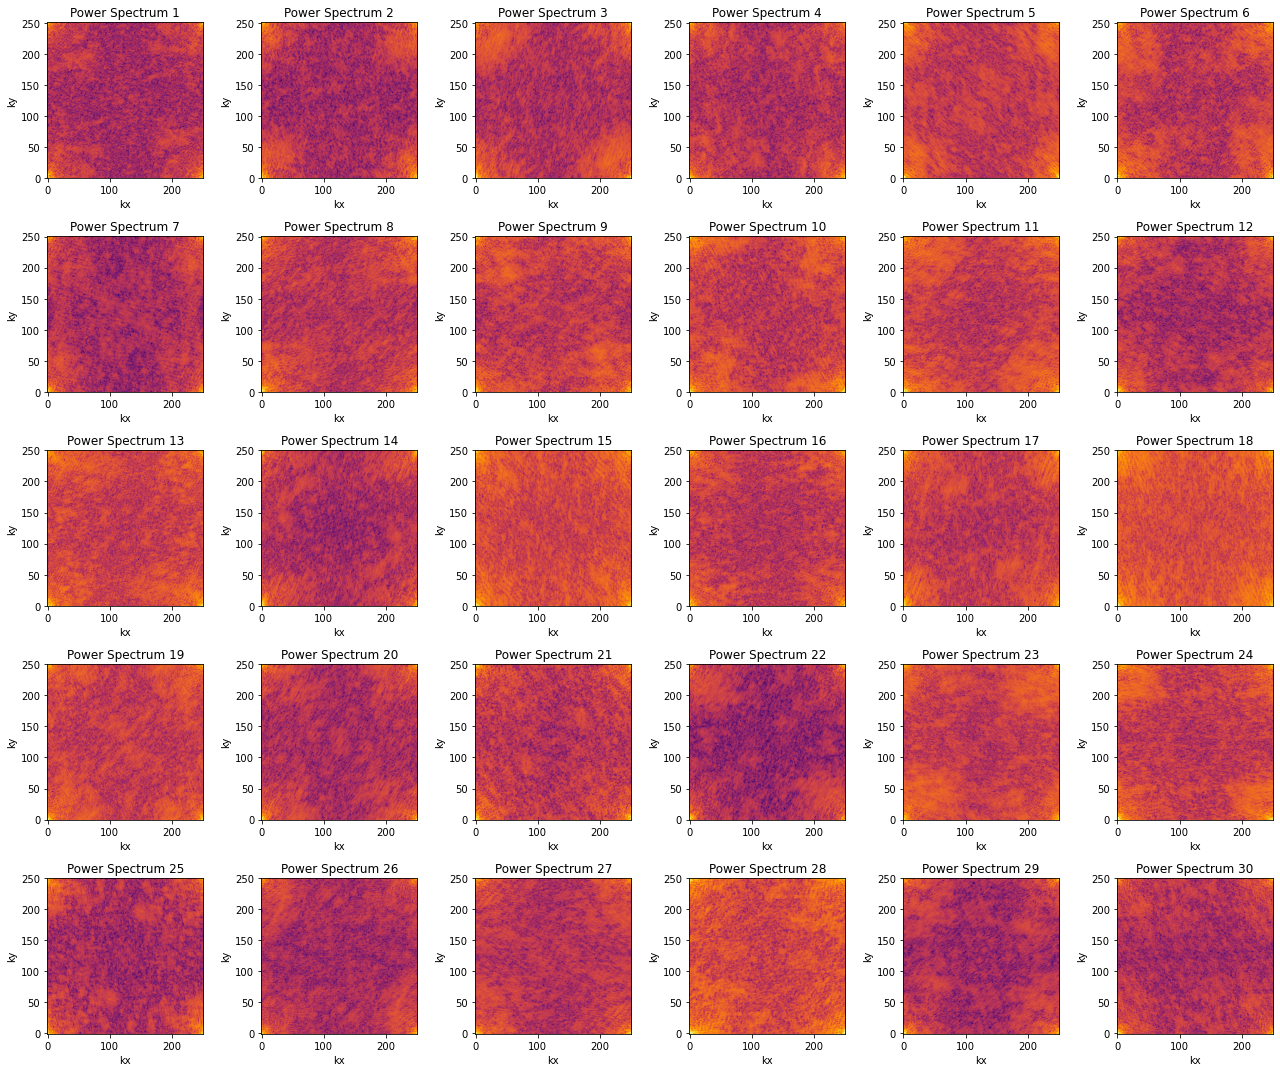

In [1]:
import numpy as np
from scipy.fftpack import fft2
import matplotlib.pyplot as plt

def compute_power_spectrum(density_field):
    """
    Compute the power spectrum of the density field.
    """
    # Compute the Fourier transform of the density field
    density_fft = fft2(density_field)
    
    # Compute the power spectrum
    power_spectrum = np.abs(density_fft)**2
    
    return power_spectrum

def plot_power_spectrum(ax, power_spectrum, index):
    """
    Plot the power spectrum on a given axis.
    """
    ax.imshow(np.log10(power_spectrum), origin='lower', cmap='inferno')
    ax.set_title(f'Power Spectrum {index+1}')
    ax.set_xlabel('kx')
    ax.set_ylabel('ky')

file_path = "all_substructure.npy"
all_sub = np.load(file_path)
host = np.load("host_k0.npy")

num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Compute and plot power spectra for each density field
for i, substructure in enumerate(all_sub):
    # Compute the power spectrum
    power_spectrum = compute_power_spectrum(substructure)
    
    # Determine subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot the power spectrum on the corresponding subplot
    plot_power_spectrum(axes[row_index, col_index], power_spectrum, i)

for i in range(len(all_sub), num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

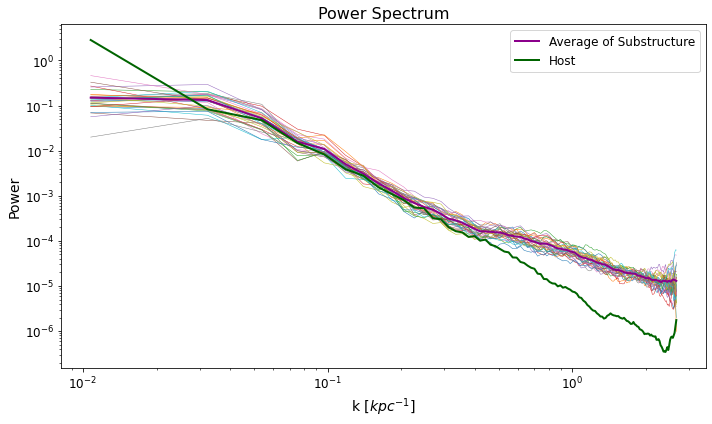

In [11]:
import numpy as np
from scipy.fftpack import fft2
import matplotlib.pyplot as plt

def compute_power_spectrum(density_field):
    """
    Compute the power spectrum of the density field.
    """
    # Compute the Fourier transform of the projected density field
    density_fft = fft2(density_field)
    
    # Compute the power spectrum
    power_spectrum = np.abs(density_fft)**2
    
    return power_spectrum

def radial_average(power_spectrum):
    """
    Compute the radial average of the power spectrum.
    """
    # Calculate the magnitude of wave vectors
    nx, ny = power_spectrum.shape
    kx = np.fft.fftfreq(nx) * 2 * np.pi
    ky = np.fft.fftfreq(ny) * 2 * np.pi
    k = np.sqrt(kx[:, np.newaxis]**2 + ky**2)
    
    # Compute the radial average
    k_bins = np.linspace(0, np.max(k), min(nx, ny) // 2)
    #print(np.max(k))
    k_centers = 0.5 * (k_bins[1:] + k_bins[:-1])
    radial_profile, _ = np.histogram(k, bins=k_bins, weights=power_spectrum)
    counts, _ = np.histogram(k, bins=k_bins)
    radial_average = radial_profile / counts
    
    return k_centers, radial_average

def plot_power_spectrum(k, radial_average, label=None, linewidth=1, color = None):
    """
    Plot the power spectrum as a function of k.
    """
    plt.plot(k, radial_average, label=label, linewidth=linewidth, color = color)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Power Spectrum', fontsize=16)
    plt.xlabel('k [$kpc^{-1}$]', fontsize=14)
    plt.ylabel('Power', fontsize=14)


    
# Load the density fields
file_path = "all_substructure.npy"
all_sub = np.load(file_path)
host = np.load("host_k0.npy")

def plot_all_power_spectra(all_sub, host):

    # Initialize arrays to store power spectra
    all_power_spectra = []
    all_k = []
    pix_size = 1.16/0.7

    # Compute and plot power spectra for each substructure density field
    for i, substructure in enumerate(all_sub):
        # Compute the power spectrum
        power_spectrum = compute_power_spectrum(substructure)

        # Compute the radial average
        k, radial_avg = (radial_average(power_spectrum))

        k /= pix_size # Convert to per kpc units, using the fact that resolution of pixel is 3.3 kpc
        radial_avg *= pix_size

        # Plot the power spectrum
        plot_power_spectrum(k, radial_avg, linewidth=0.5)

        # Store power spectrum and k values
        all_power_spectra.append(radial_avg)
        all_k.append(k)

    # Average Substructure Power Spectrum
    avg_power_spectrum = np.mean(all_power_spectra, axis=0)
    avg_k = np.mean(all_k, axis=0)
    plot_power_spectrum(avg_k, avg_power_spectrum, label='Average of Substructure', linewidth=2, color = 'darkmagenta')


    # Host halo power spectrum
    power_spectrum = compute_power_spectrum(host)
    k, radial_avg = (radial_average(power_spectrum))
    k /= pix_size
    radial_avg /= pix_size

    # Plot the power spectrum
    plot_power_spectrum(k, radial_avg, linewidth= 2.0, label = "Host", color = "darkgreen")

    plt.legend(fontsize=12)
    plt.rcParams["figure.figsize"] = (10, 6)  
    plt.tick_params(axis='both', which='major', labelsize=12)  
    plt.tick_params(axis='both', which='minor', labelsize=10) 
    plt.tight_layout()  
    plt.savefig("Power_spectra.png")
    plt.show()

    
plot_all_power_spectra(all_sub, host)

In [7]:
1/(1.16/0.7)

0.6034482758620691

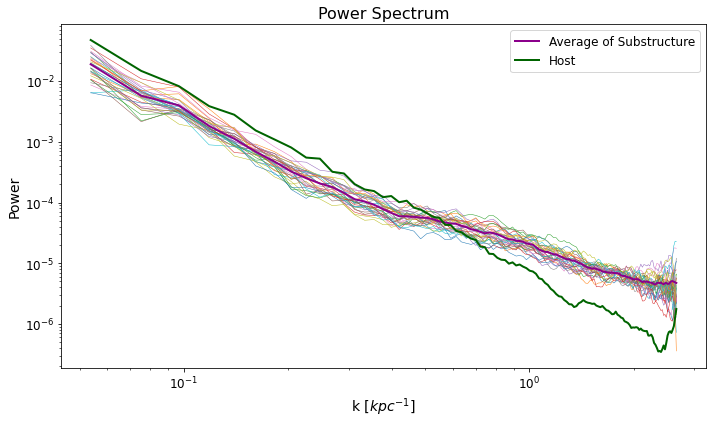

In [10]:
import numpy as np
from scipy.fftpack import fft2
import matplotlib.pyplot as plt

def compute_power_spectrum(density_field):
    """
    Compute the power spectrum of the density field.
    """
    # Compute the Fourier transform of the projected density field
    density_fft = fft2(density_field)
    
    # Compute the power spectrum
    power_spectrum = np.abs(density_fft)**2
    
    return power_spectrum

def radial_average(power_spectrum):
    """
    Compute the radial average of the power spectrum.
    """
    # Calculate the magnitude of wave vectors
    nx, ny = power_spectrum.shape
    kx = np.fft.fftfreq(nx) * 2 * np.pi
    ky = np.fft.fftfreq(ny) * 2 * np.pi
    k = np.sqrt(kx[:, np.newaxis]**2 + ky**2)
    
    # Compute the radial average
    k_bins = np.linspace(0, np.max(k), min(nx, ny) // 2)
    k_centers = 0.5 * (k_bins[1:] + k_bins[:-1])
    radial_profile, _ = np.histogram(k, bins=k_bins, weights=power_spectrum)
    counts, _ = np.histogram(k, bins=k_bins)
    radial_average = radial_profile / counts
    
    return k_centers, radial_average

def plot_power_spectrum(k, radial_average, label=None, linewidth=1, color=None):
    """
    Plot the power spectrum as a function of k.
    """
    plt.plot(k, radial_average, label=label, linewidth=linewidth, color=color)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Power Spectrum', fontsize=16)
    plt.xlabel('k [$kpc^{-1}$]', fontsize=14)
    plt.ylabel('Power', fontsize=14)

# Load the density fields
file_path = "all_substructure.npy"
all_sub = np.load(file_path)

# Initialize arrays to store power spectra
all_power_spectra = []
all_k = []

# Compute and plot power spectra for each density field
for i, substructure in enumerate(all_sub):
    # Compute the power spectrum
    power_spectrum = compute_power_spectrum(substructure)

    # Compute the radial average
    k, radial_avg = radial_average(power_spectrum)
    
    k *= 0.6034482758620691 # Convert to per kpc units, using the fact that resolution of pixel is 3.3 kpc
    radial_avg *= 0.6034482758620691
    
    k_cutoff = 0.05
    
    # Filter the data for x values larger than 1.7e-2
    filtered_k = k[k > k_cutoff]
    filtered_radial_avg = radial_avg[k > k_cutoff]
    
    # Plot the power spectrum
    plot_power_spectrum(filtered_k, filtered_radial_avg, linewidth=0.5)

    # Store power spectrum and k values
    all_power_spectra.append(filtered_radial_avg)
    all_k.append(filtered_k)

# Compute average power spectrum
avg_power_spectrum = np.mean(all_power_spectra, axis=0)
avg_k = np.mean(all_k, axis=0)

# Plot the average power spectrum with thicker line
plot_power_spectrum(avg_k, avg_power_spectrum, label='Average of Substructure', linewidth=2, color='darkmagenta')


### Host halo power spectrum

# Compute the power spectrum
power_spectrum = compute_power_spectrum(host)

# Compute the radial average
k, radial_avg = (radial_average(power_spectrum))

k *= 0.6034482758620691 # Convert to per kpc units, using the fact that resolution of pixel is 3.3 kpc
radial_avg *= 0.6034482758620691

k_cutoff = 0.05

# Filter the data for x values larger than 1.7e-2
filtered_k = k[k > k_cutoff]
filtered_radial_avg = radial_avg[k > k_cutoff]

# Plot the power spectrum
plot_power_spectrum(filtered_k, filtered_radial_avg, linewidth= 2.0, label = "Host", color = "darkgreen")

plt.legend(fontsize=12)
plt.rcParams["figure.figsize"] = (10, 6)  
plt.tick_params(axis='both', which='major', labelsize=12)  
plt.tick_params(axis='both', which='minor', labelsize=10) 
plt.tight_layout()  
plt.show()